In [2]:
import pandas as pd

notas = pd.read_csv("dados/ratings.csv")
notas.head()


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [3]:
notas.shape

(100836, 4)

In [4]:
notas.columns = ["usuarioID", "filmesId", "Notas", "Momento"]
notas.head()

,usuarioID,filmesId,Notas,Momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [5]:
notas["Notas"].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [6]:
notas["Notas"].value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: Notas, dtype: int64

In [7]:
notas["Notas"].mean()

3.501556983616962

In [8]:
notas.Notas.head()

0    4.0
1    4.0
2    4.0
3    5.0
4    5.0
Name: Notas, dtype: float64

<AxesSubplot:ylabel='Frequency'>

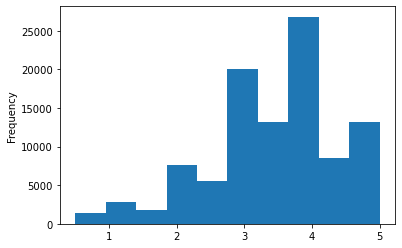

In [9]:
notas.Notas.plot(kind = 'hist')

In [10]:
print("Media = ", notas.Notas.mean())
print("Mediana = ", notas.Notas.median())

Media =  3.501556983616962
Mediana =  3.5


In [11]:
notas.Notas.describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: Notas, dtype: float64

C:\Users\enzow\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Notas'>

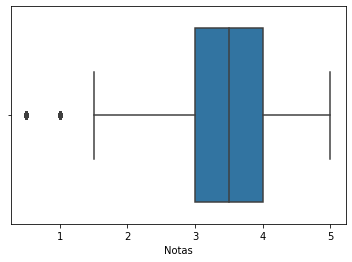

In [12]:
import seaborn as sns

sns.boxplot(notas.Notas)

In [13]:
filmes = pd.read_csv("dados/movies.csv")
filmes.columns = ["filmesId", "Titulos", "Genero"]
filmes.head()

,filmesId,Titulos,Genero
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


# Analisando notas

In [14]:
notas.query("filmesId==2").Notas.mean()

3.4318181818181817

In [15]:
medias_por_filme = notas.groupby("filmesId").mean()["Notas"]
medias_por_filme.head()

filmesId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: Notas, dtype: float64

<AxesSubplot:ylabel='Frequency'>

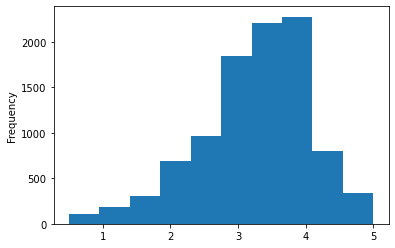

In [16]:
medias_por_filme.plot(kind = "hist")

<AxesSubplot:ylabel='Notas'>

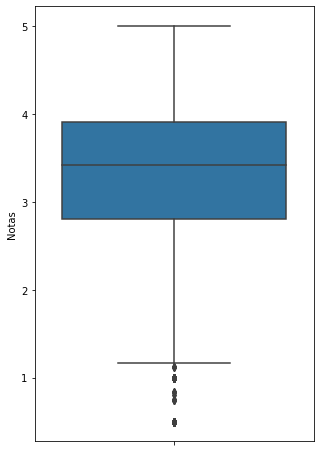

In [17]:
import matplotlib.pyplot as plt


plt.figure(figsize=(5,8))

sns.boxplot(y=medias_por_filme)

In [18]:
medias_por_filme.describe()

count    9724.000000
mean        3.262448
std         0.869874
min         0.500000
25%         2.800000
50%         3.416667
75%         3.911765
max         5.000000
Name: Notas, dtype: float64

C:\Users\enzow\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Notas', ylabel='Density'>

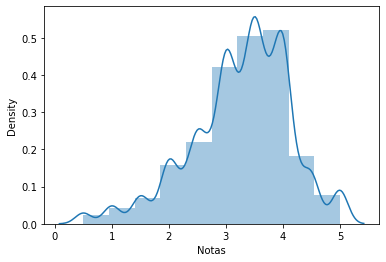

In [19]:
sns.distplot(medias_por_filme, bins = 10) 

Text(0.5, 1.0, 'Histograma dos filmes')

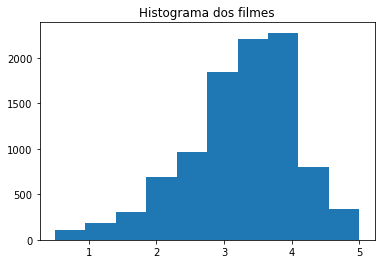

In [20]:
import matplotlib.pyplot as plt

plt.hist(medias_por_filme)
plt.title("Histograma dos filmes")

# USANDO OUTRA BASE DE DADOS

In [21]:
tmdb = pd.read_csv("dados/tmdb_5000_movies.csv")
tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [22]:
tmdb.original_language.unique() # categorica nominal

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

1º grau
2º grau
3º grau

1º gras < 2º gras < 3º grau     CATEGORICA ORDINAL


Budget => orçamento => quantitativa continuo 

quantidades de votos => 1 , 2, 3, 4 não tem 2.6 votos.

In [23]:
contagem_de_linha = tmdb["original_language"].value_counts().to_frame().reset_index()
contagem_de_linha.columns = ["original_language", "total"]
contagem_de_linha.head()

,original_language,total
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27


<AxesSubplot:xlabel='original_language', ylabel='total'>

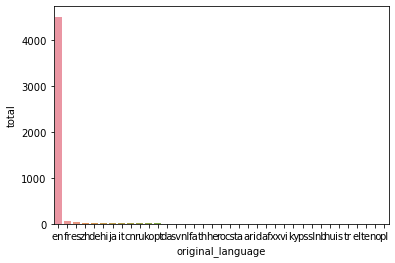

In [24]:
sns.barplot(x = "original_language",y = 'total', data = contagem_de_linha )

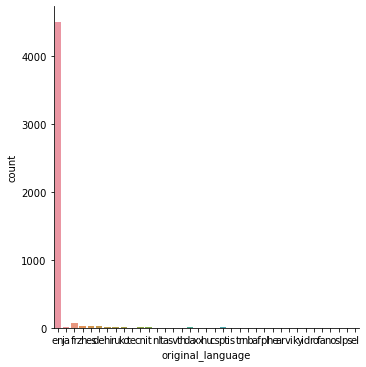

In [25]:
sns.catplot(x = 'original_language', data= tmdb, kind='count')

([<matplotlib.patches.Wedge at 0x22a744d1e20>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'en'),
  Text(1.0355355017029462, -0.3710339940124459, 'fr'),
  Text(1.0579676486019882, -0.3011718023181785, 'es'),
  Text(1.0687996606645356, -0.26012936274741094, 'zh'),
  Text(1.0773191105706255, -0.22222406260195313, 'de'),
  Text(1.0835167978583342, -0.18971386021801853, 'hi'),
  Text(1.0875756432724297, -0.16486121484618815, 'ja'),
  Text(1.0906010773146022, -0.14348968659882622, 'it'),
  Text(1.092883487371409, -0.12492270822755745, 'cn'),
  Text(1.0946390911069936, -0.10846778425161549, 'ru'),
  Text(1.0960865535188649, -0.09270527058984593, 'ko'),
  Text(1.0972054830031333, -0.07835896928789601, 'pt'),
  Text(1.097965443340663, -0.06687215586282344, 'da'),
  Text(1.0984565010300316, -0.05825217030171998, 'sv'),
  Text(1.0987803851616647, -0.0517847968421653, 'nl'),
  Text(1.0990363161210686, -0.04603450713357274, 'fa'),
  Text(1.0992355702663055, -0.04100196411527794, 'th'),
  Text(

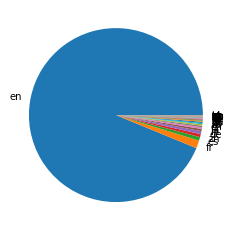

In [26]:
plt.pie(contagem_de_linha['total'], labels = contagem_de_linha['original_language'])

In [27]:
total_por_lingua = tmdb['original_language'].value_counts()
total_geral = total_por_lingua.sum()
total_de_ingles = total_por_lingua.loc['en']
total_do_resto = total_geral-total_de_ingles

print(total_de_ingles, total_do_resto)

4505 298


<AxesSubplot:xlabel='lingua', ylabel='total'>

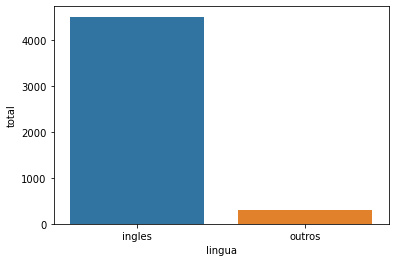

In [28]:
dados = {
    'lingua' : ['ingles', 'outros'],
    'total' : [total_de_ingles, total_do_resto]
}
dados = pd.DataFrame(dados)

sns.barplot (x = 'lingua', y = 'total', data= dados)

([<matplotlib.patches.Wedge at 0x22a74bf74c0>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'ingles'),
  Text(1.0791697511565306, -0.2130555049482467, 'outros')])

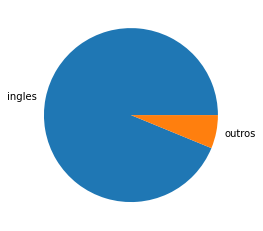

In [29]:
plt.pie(dados['total'], labels = dados['lingua'])

In [30]:
total_por_lingua_de_outros_filmes = tmdb.query("original_language != 'en' ").original_language.value_counts()
total_por_lingua_de_outros_filmes

fr    70
es    32
de    27
zh    27
hi    19
ja    16
it    14
cn    12
ko    11
ru    11
pt     9
da     7
sv     5
nl     4
fa     4
he     3
th     3
ro     2
ar     2
ta     2
id     2
cs     2
af     1
xx     1
tr     1
vi     1
pl     1
is     1
te     1
sl     1
ps     1
el     1
hu     1
ky     1
nb     1
no     1
Name: original_language, dtype: int64

In [31]:
populares = tmdb.query("popularity > 700")

pd.DataFrame(populares['original_title'])




,original_title
95,Interstellar
546,Minions


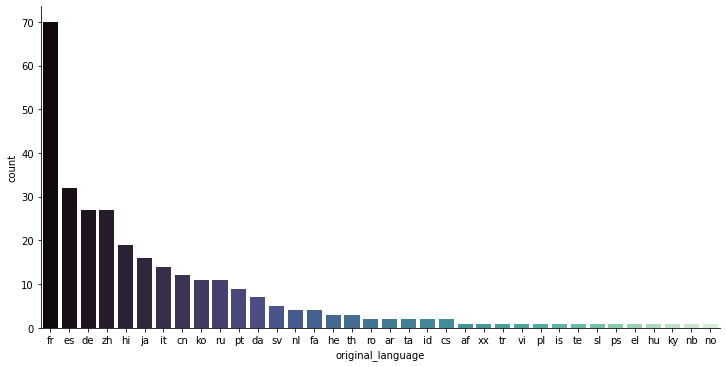

In [32]:
filmes_nao_ingles = tmdb.query("original_language != 'en' ")

sns.catplot(x = 'original_language', kind='count',data=filmes_nao_ingles,
            aspect= 2, order=total_por_lingua_de_outros_filmes.index, palette="mako" )




In [33]:
filmes.head(2)

,filmesId,Titulos,Genero
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy


In [34]:
nota_do_toy_story = notas.query("filmesId == 1")
nota_do_jumanji = notas.query("filmesId == 2")

print(len(nota_do_toy_story), len(nota_do_jumanji))

215 110


In [35]:
pd.DataFrame(notas)

,usuarioID,filmesId,Notas,Momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [36]:
print("Nota média do Toy Story = %.2f"% nota_do_toy_story.Notas.mean())
print("Nota média do Jumanji = %.2f"% nota_do_jumanji.Notas.mean())

Nota média do Toy Story = 3.92
Nota média do Jumanji = 3.43


In [37]:
print("Nota média do Toy Story = %.2f"% nota_do_toy_story.Notas.median())
print("Nota média do Jumanji = %.2f"% nota_do_jumanji.Notas.median())

Nota média do Toy Story = 4.00
Nota média do Jumanji = 3.50


In [38]:
import numpy as np

filme1 = np.append(np.array([2.5] * 10) , np.array([3.5] * 10))
filme2 = np.append(np.array([5] * 10) , np.array([1] * 10))


In [45]:
print(filme1.mean(), filme2.mean())
print(np.std(filme1), np.std(filme2))
print(np.median(filme2), np.median(filme1))

3.0 3.0
0.5 2.0
3.0 3.0


C:\Users\enzow\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\enzow\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

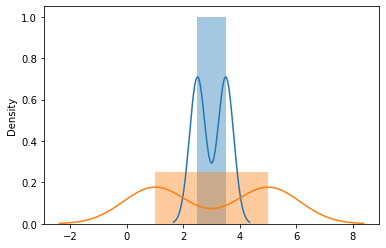

In [40]:
sns.distplot(filme1)
sns.distplot(filme2)


{'whiskers': [<matplotlib.lines.Line2D at 0x22a74ef0340>,
 'caps': [<matplotlib.lines.Line2D at 0x22a74ef0a00>,
 'boxes': [<matplotlib.lines.Line2D at 0x22a74ee3fa0>,
 'medians': [<matplotlib.lines.Line2D at 0x22a74efd100>,
 'fliers': [<matplotlib.lines.Line2D at 0x22a74efd460>,
 'means': []}

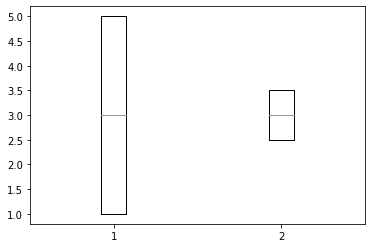

In [41]:
plt.boxplot([filme2, filme1])

C:\Users\enzow\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\enzow\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Notas'>

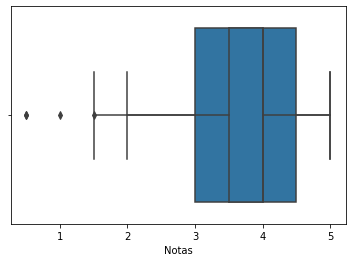

In [42]:
sns.boxplot(nota_do_toy_story.Notas)
sns.boxplot(nota_do_jumanji.Notas)

C:\Users\enzow\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Notas'>

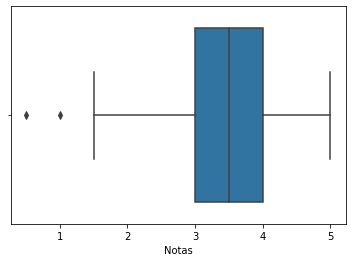

In [43]:
sns.boxplot(nota_do_jumanji.Notas)

<AxesSubplot:xlabel='filmesId', ylabel='Notas'>

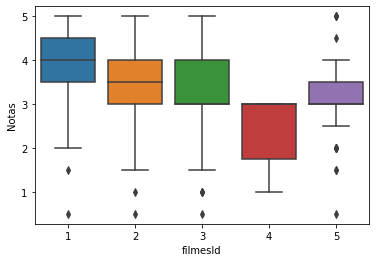

In [44]:
sns.boxplot(x= "filmesId" , y= "Notas", data= notas.query("filmesId in [1,2,3,4,5]"))